<h1 style="background-color:rgb(221, 83, 73); font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
<b>Obesity Risk Prediction</b>
</h1>

![Obesity Risk](./obesity%20risk.png)


**Dataset Overview**

This notebook aims to analyze and predict obesity levels based on lifestyle, dietary habits, and personal characteristics.

**Key Features**  

|  Column  |             Meaning       |
|----------|---------------------------|
|  Gender  |      Gender (1=Female or 0=Male)       |
|  Age  |         ages between 14 and 61        |
|  Height  |             Height       |
|  Weight  |             Weight       |
|  family_history_with_overweight  |             family member suffered or suffers from overweight (1=Yes, 0=No)    |
|  FAVC  |              Frequent consumption of high caloric food (0=Yes, 1=No)       |
|  FCVC  |            Frequency of consumption of vegetables (1, 2, or 3)      |
|  NCP  |             Number of main meals (1, 2, 3, or 4)      |
|  CAEC  |          Consumption of food between meals (1=No, 2=Sometimes, 3=Frequently, 4=Always)      |
|  SMOKE  |         Smoker or not (0=Yes, 1=No)      |
|  CH2O  |        Consumption of water daily       |
|  SCC  |         Calories consumption monitoring (0=Yes, 1=No)      |
|  FAF  |         Physical activity frequency (0, 1, 2, or 3)       |
|  TUE  |        Time using technology devices (0, 1, or 2)      |
|  CALC  |       Consumption of alcohol (1=No, 2=Sometimes, 3=Frequently , 4=Always)      |
|  MTRANS  |          Transportation used (automobile, motorbike, bike, public transportation, or walking)     |
|  NObeyesdad  |            1=Insufficient Weight
|               |             2=Normal Weight
|               |             3=Overweight Level I
|               |             4=Overweight Level II
|               |             5=Obesity Type I
|               |             6=Obesity Type_II
|               |             7=Obesity Type III    |


# `01` Import Libraries

In [77]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

## Additional Libraries

In [78]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/competitions/playground-series-s4e2/data)

In [79]:
train = pd.read_csv('train.csv')    
test = pd.read_csv('test.csv')  

In [80]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [81]:
train.shape, test.shape

((20758, 18), (13840, 17))

# `03` Simple Analysis & Exploratory Data Analysis (EDA) 

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

##  No Null Values

In [83]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [84]:
test.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

## No Duplicates values

In [85]:

train.duplicated().sum()

np.int64(0)

In [86]:
test.duplicated().sum()   

np.int64(0)

In [87]:
train.nunique()    

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

## Data Visualization

- target variable almost balanced

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_15144\2890510794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train['NObeyesdad'], palette="Set2")


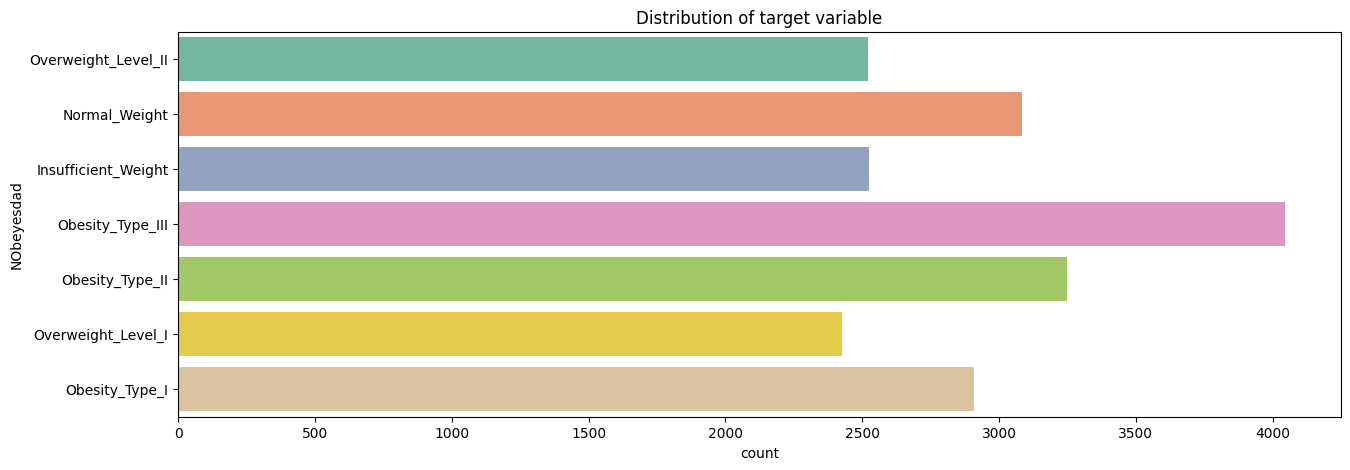

In [88]:
plt.figure(figsize=(15,5))
sns.countplot(train['NObeyesdad'], palette="Set2")
plt.title('Distribution of target variable')
plt.show()

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_15144\2408713365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[column], palette="Set2")


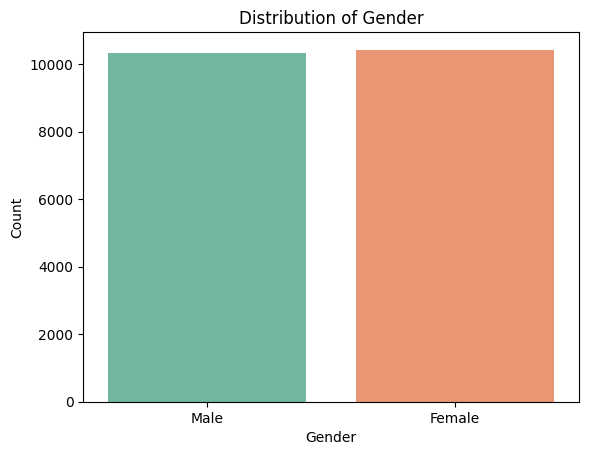

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_15144\2408713365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[column], palette="Set2")


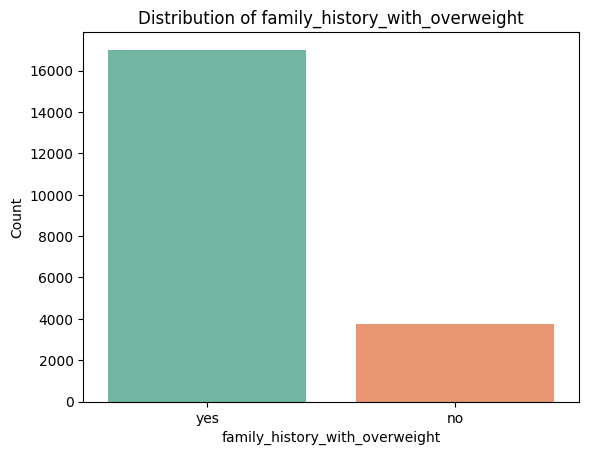

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_15144\2408713365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[column], palette="Set2")


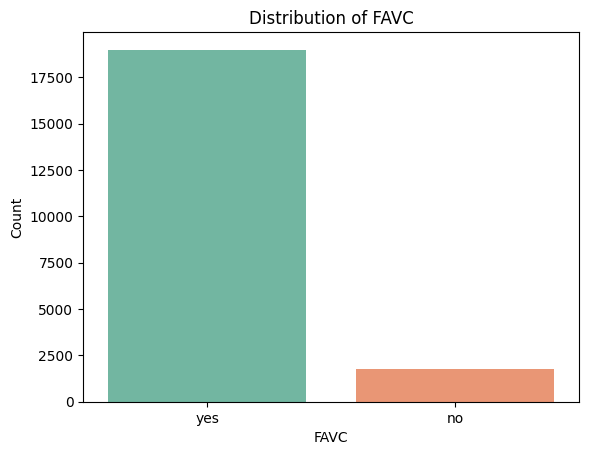

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_15144\2408713365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[column], palette="Set2")


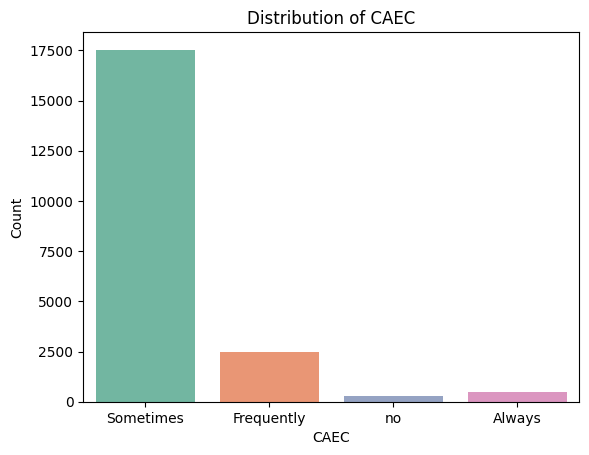

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_15144\2408713365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[column], palette="Set2")


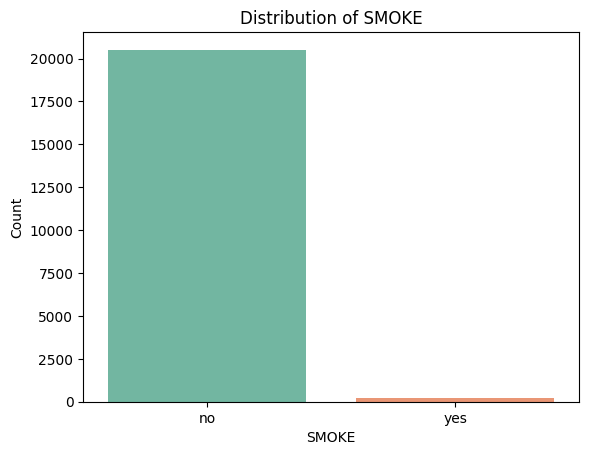

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_15144\2408713365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[column], palette="Set2")


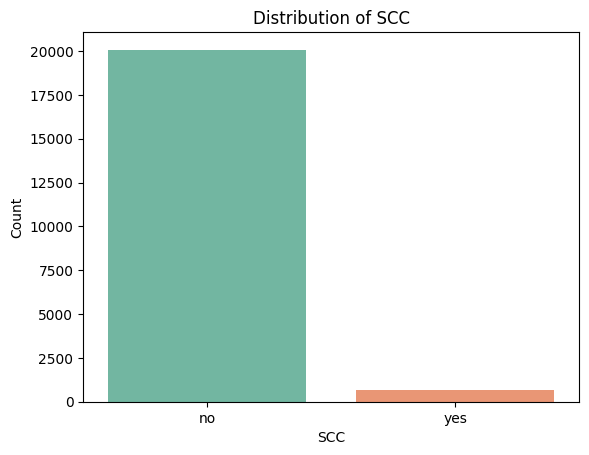

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_15144\2408713365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[column], palette="Set2")


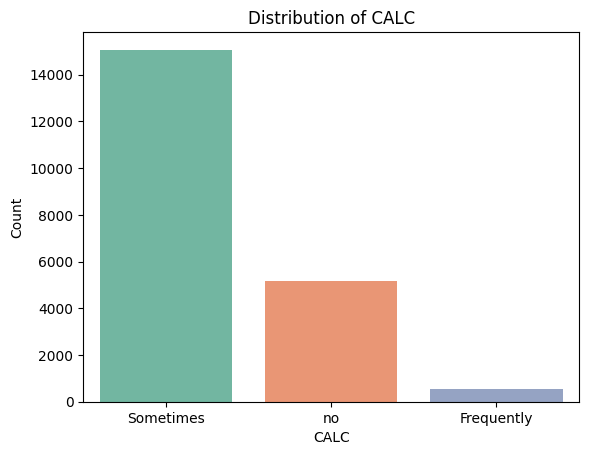

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_15144\2408713365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[column], palette="Set2")


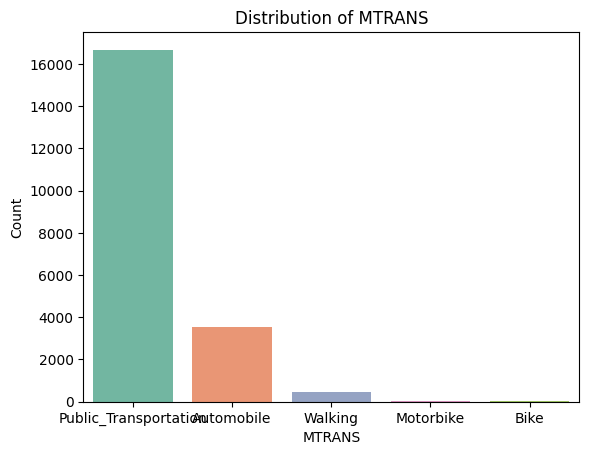

In [89]:
for column in train.columns:
    if train[column].dtype == 'object' and train[column].nunique() < 6:
        sns.countplot(x=train[column], palette="Set2")
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

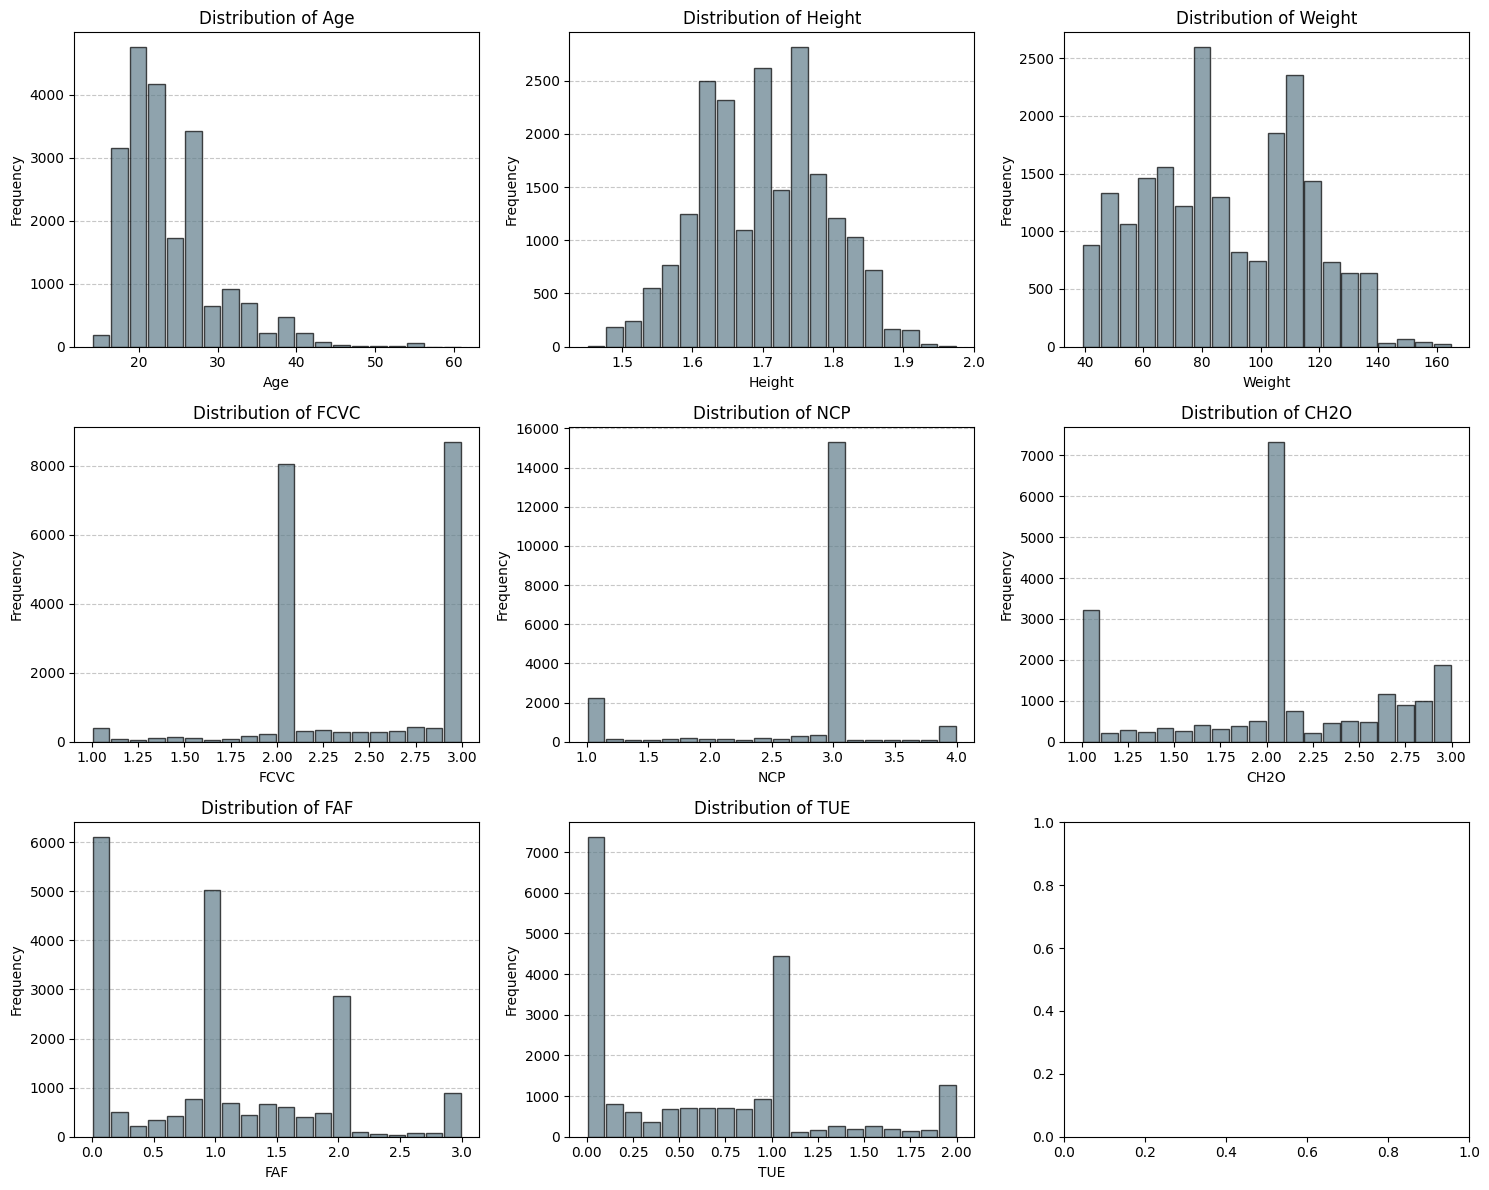

In [90]:
columns_hist = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid layout

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(columns_hist):
    axes[i].hist(train[col], bins=20, color='#607D8B', edgecolor='black', alpha=0.7, rwidth=0.9)
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
    axes[i].set_axisbelow(True)  # Ensure grid is behind the bars
plt.tight_layout()   # prevent overlapping labels and titles , making a clean and well-organized figure 
plt.show()


<b>We can see that :<br>

1) Obesity Type III is more prevalent in females.

2) Obesity Type II is more common in males.

3) Insufficient conditions appear more frequently in females.

4) Overweight and normal weight categories show a more balanced distribution between genders.

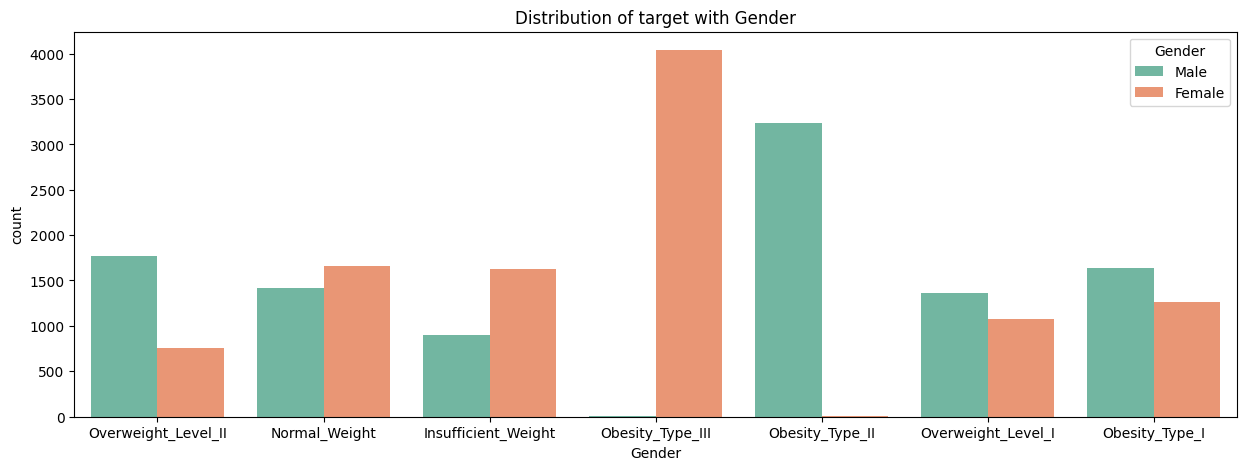

In [91]:
plt.figure(figsize=(15,5))
sns.countplot(x=train['NObeyesdad'], hue=train['Gender'], palette='Set2')
plt.title('Distribution of target with Gender')
plt.xlabel('Gender')
plt.legend(title='Gender', loc='upper right')
plt.show()

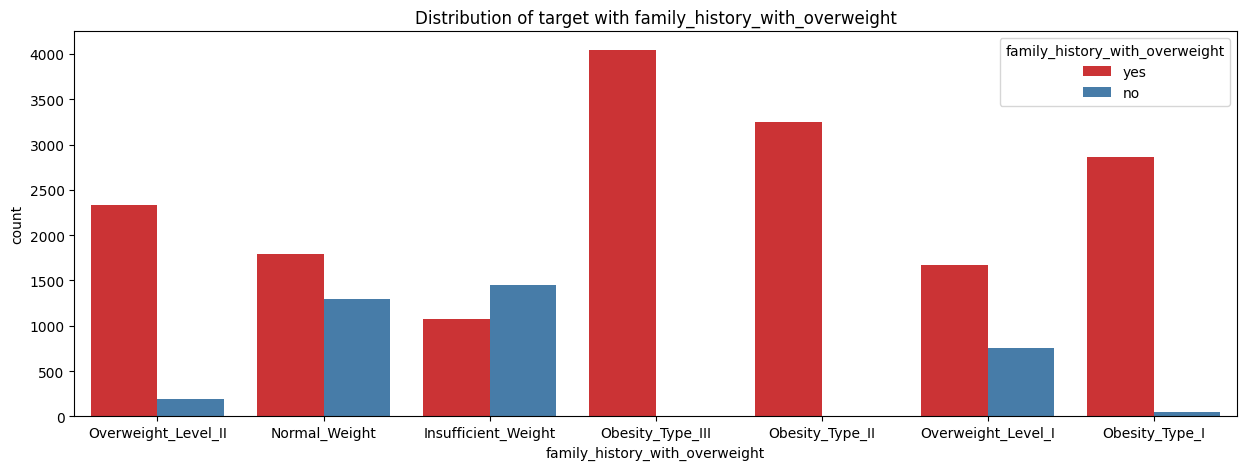

In [92]:
plt.figure(figsize=(15,5))
sns.countplot(x=train['NObeyesdad'], hue=train['family_history_with_overweight'], palette='Set1')
plt.title('Distribution of target with family_history_with_overweight')
plt.xlabel('family_history_with_overweight')
plt.legend(title='family_history_with_overweight', loc='upper right')
plt.show()

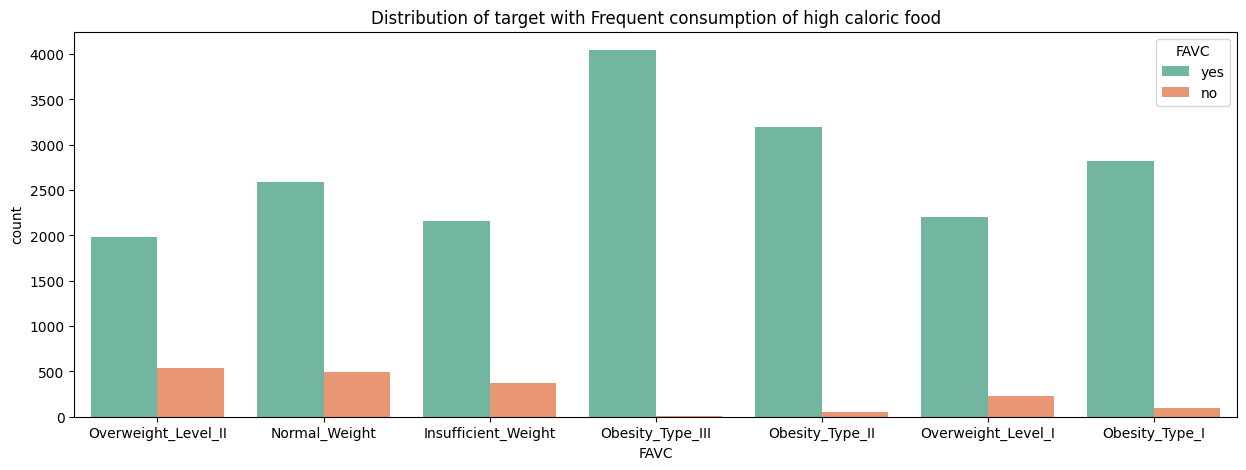

In [93]:
plt.figure(figsize=(15,5))
sns.countplot(x=train['NObeyesdad'], hue=train['FAVC'], palette='Set2')
plt.title('Distribution of target with Frequent consumption of high caloric food')
plt.xlabel('FAVC')
plt.legend(title='FAVC', loc='upper right')
plt.show()

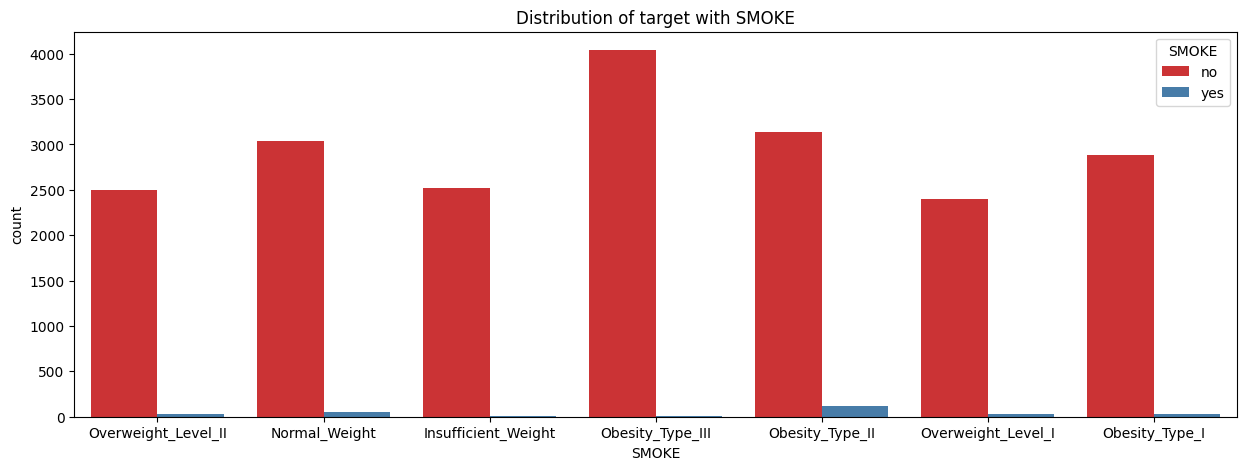

In [94]:
plt.figure(figsize=(15,5))
sns.countplot(x=train['NObeyesdad'], hue=train['SMOKE'], palette='Set1')
plt.title('Distribution of target with SMOKE')
plt.xlabel('SMOKE')
plt.legend(title='SMOKE', loc='upper right')
plt.show()

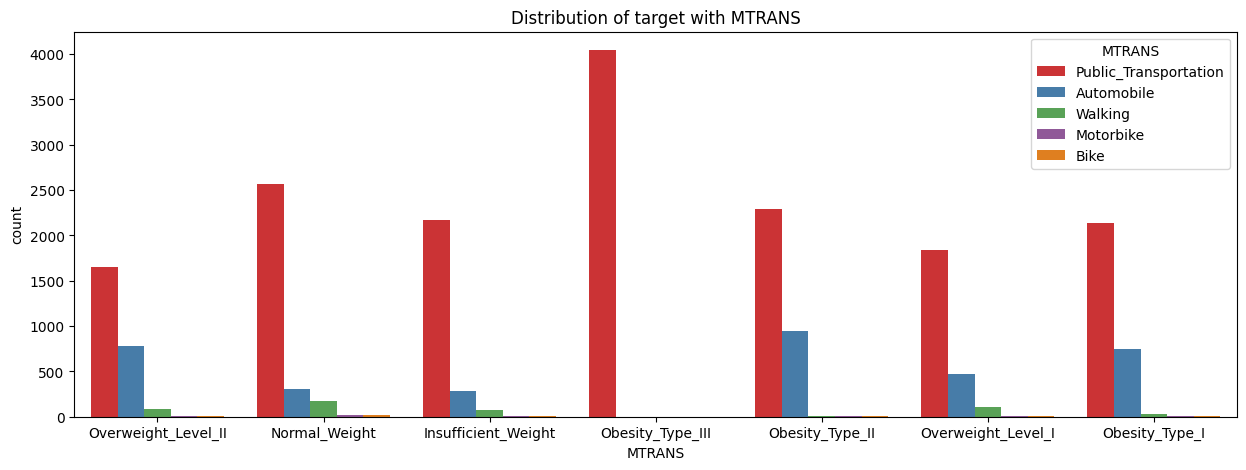

In [95]:
plt.figure(figsize=(15,5))
sns.countplot(x=train['NObeyesdad'], hue=train['MTRANS'], palette='Set1')
plt.title('Distribution of target with MTRANS')
plt.xlabel('MTRANS')
plt.legend(title='MTRANS', loc='upper right')
plt.show()

# `04` Data Preprocessing

In [96]:
train.drop('id', axis=1, inplace=True)
#train.drop("SMOKE", axis=1, inplace=True)
#train.drop("MTRANS", axis=1, inplace=True)

In [97]:
x=train.drop('NObeyesdad',axis=1)
y=train['NObeyesdad']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)

In [98]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16606, 16), (4152, 16), (16606,), (4152,))

In [99]:
x_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
13224,Female,18.871917,1.544263,41.535047,no,yes,2.969205,1.0,Sometimes,no,1.068493,no,0.000000,0.70778,Sometimes,Public_Transportation
1709,Male,25.139466,1.761519,112.879662,yes,yes,1.735664,3.0,Sometimes,no,2.112670,no,1.168368,0.00000,Sometimes,Public_Transportation
18325,Female,26.000000,1.680000,80.000000,yes,yes,3.000000,3.0,Sometimes,no,2.000000,no,2.000000,1.00000,Sometimes,Public_Transportation
18264,Male,21.727380,1.807538,105.000276,yes,yes,2.000000,3.0,Sometimes,no,3.000000,no,2.000000,1.00000,Sometimes,Public_Transportation
10035,Male,22.188810,1.650052,95.285898,yes,yes,2.000000,3.0,Sometimes,no,2.297896,no,1.609801,1.00000,no,Public_Transportation


- apply StandardScaler to normalize the data on Age , weight as they are normally distributed

In [100]:
scaler = StandardScaler()
x_train[['Age', 'Weight']] = scaler.fit_transform(x_train[['Age', 'Weight']])
x_test[['Age', 'Weight']] = scaler.transform(x_test[['Age', 'Weight']])

In [101]:
#categorical = train[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'CALC']]
categorical = train[['Gender', 'family_history_with_overweight', 'FAVC','SMOKE', 'CAEC', 'SCC', 'CALC', 'MTRANS']]
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

x_train[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']] = encoder.fit_transform(x_train[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']])
x_test[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']] = encoder.transform(x_test[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']])
#x_train[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'CALC']] = encoder.fit_transform(x_train[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'CALC']])
#x_test[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'CALC']] = encoder.transform(x_test[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'CALC']])

In [102]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# `05` ML Models

In [103]:
Accuracy=[]
def models(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_pred,y_test)
    print(f"Accuracy : {accuracy}")
    print(f"Classification Report : \n{classification_report(y_pred,y_test)}")
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='d')
    Accuracy.append(accuracy)

Accuracy : 0.882466281310212
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       521
           1       0.85      0.84      0.84       591
           2       0.84      0.87      0.86       565
           3       0.95      0.95      0.95       650
           4       0.99      1.00      1.00       826
           5       0.72      0.75      0.74       471
           6       0.80      0.77      0.78       528

    accuracy                           0.88      4152
   macro avg       0.87      0.87      0.87      4152
weighted avg       0.88      0.88      0.88      4152



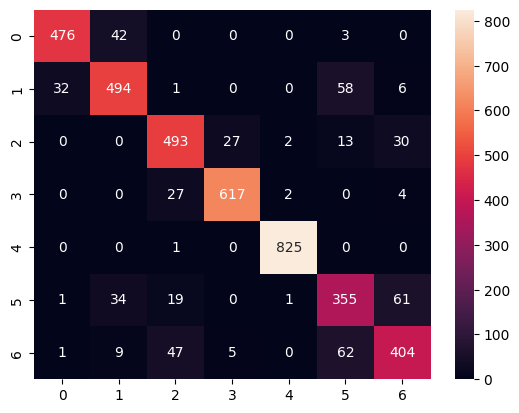

In [104]:
model1=DecisionTreeClassifier(criterion='gini', max_depth=11, min_samples_leaf=8, min_samples_split=8, splitter='best')
models(model1)

Accuracy : 0.8538053949903661
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       565
           1       0.79      0.83      0.81       552
           2       0.85      0.81      0.83       612
           3       0.97      0.92      0.94       678
           4       1.00      1.00      1.00       829
           5       0.65      0.72      0.68       448
           6       0.65      0.70      0.68       468

    accuracy                           0.85      4152
   macro avg       0.84      0.83      0.84      4152
weighted avg       0.86      0.85      0.86      4152



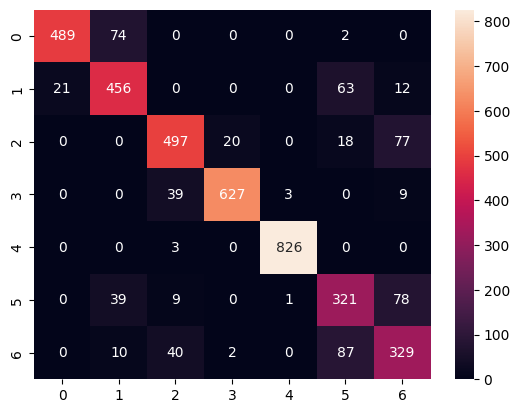

In [105]:
model2=LogisticRegression(penalty='l2', C=1.0, solver='newton-cg')
models(model2)

Accuracy : 0.869942196531792
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       534
           1       0.82      0.84      0.83       566
           2       0.87      0.85      0.86       602
           3       0.97      0.96      0.97       657
           4       0.99      1.00      1.00       826
           5       0.67      0.73      0.70       451
           6       0.72      0.70      0.71       516

    accuracy                           0.87      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.87      0.87      0.87      4152



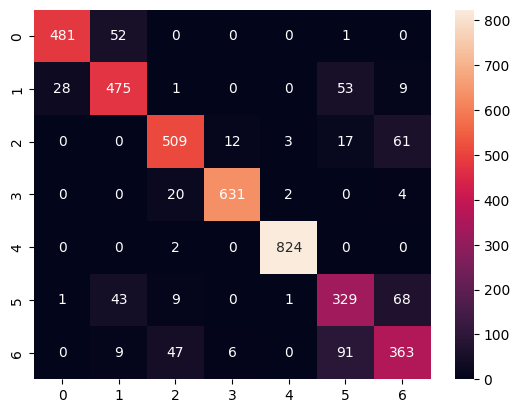

In [106]:
model3=SVC(gamma='auto', kernel='poly', C=0.8, random_state=1234)
models(model3)

Accuracy : 0.9024566473988439
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       502
           1       0.90      0.85      0.88       615
           2       0.88      0.90      0.89       579
           3       0.97      0.96      0.96       653
           4       0.99      1.00      1.00       826
           5       0.74      0.81      0.77       452
           6       0.82      0.78      0.80       525

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



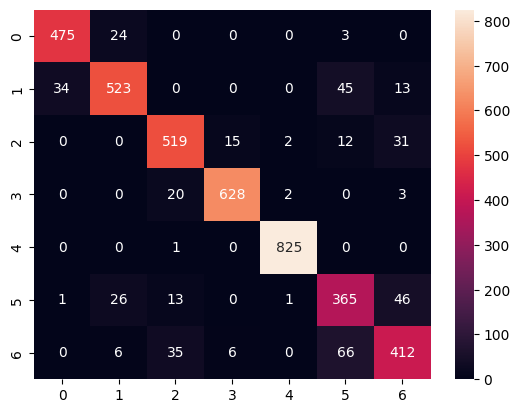

In [107]:
model4=RandomForestClassifier(n_estimators=100, max_depth=26, min_samples_leaf=2, min_samples_split=2, random_state=1234)
models(model4)

Accuracy : 0.9120905587668593
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       501
           1       0.91      0.86      0.88       615
           2       0.91      0.91      0.91       585
           3       0.98      0.97      0.97       652
           4       0.99      1.00      1.00       826
           5       0.75      0.81      0.78       455
           6       0.83      0.81      0.82       518

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



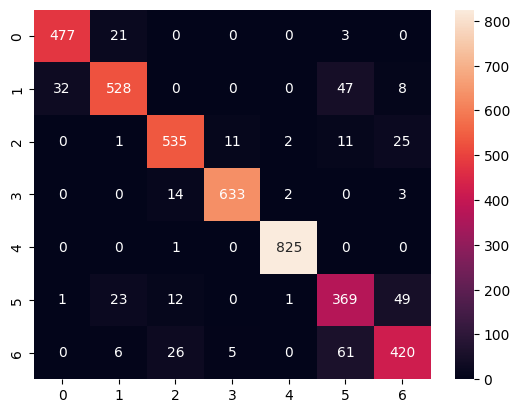

In [108]:
model5=GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, max_depth=3, n_estimators=100, random_state=1234)
models(model5)

Accuracy : 0.9144990366088632
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       498
           1       0.91      0.87      0.89       609
           2       0.91      0.90      0.90       591
           3       0.97      0.97      0.97       649
           4       0.99      1.00      1.00       826
           5       0.78      0.82      0.80       464
           6       0.84      0.82      0.83       515

    accuracy                           0.91      4152
   macro avg       0.90      0.91      0.90      4152
weighted avg       0.92      0.91      0.91      4152



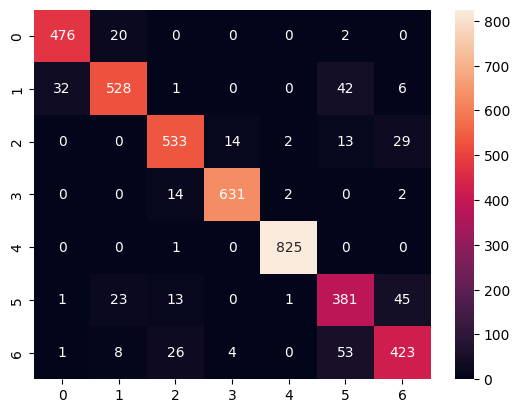

In [109]:
model6=XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=3)
models(model6)

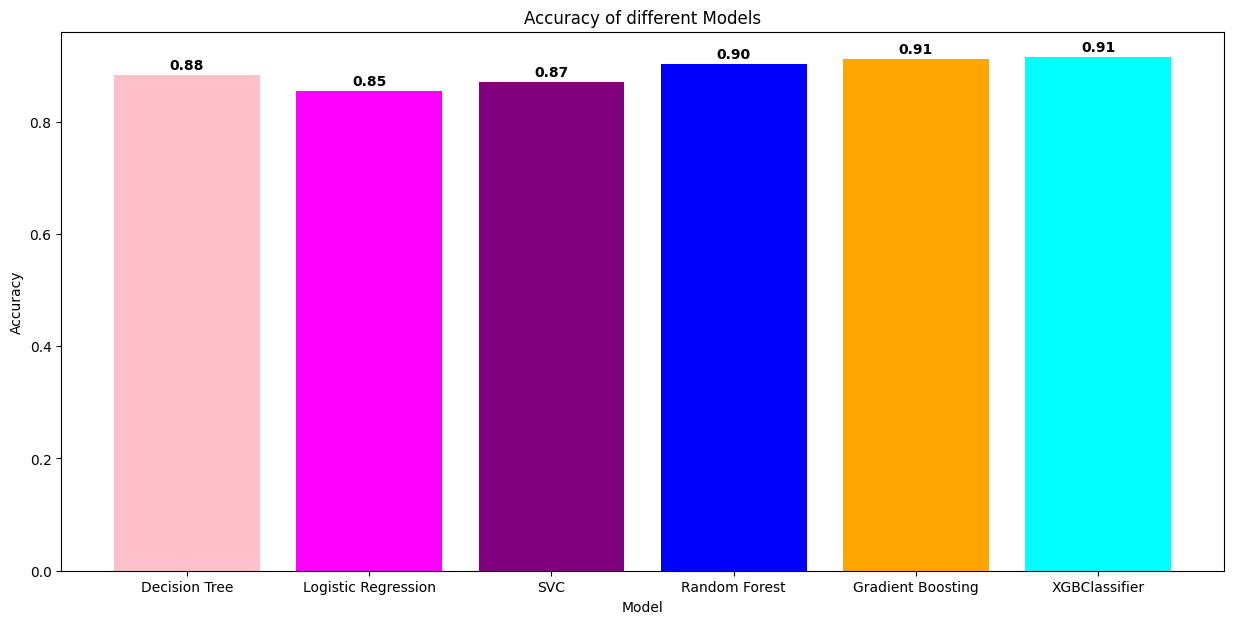

In [110]:
models = ['Decision Tree', 'Logistic Regression', 'SVC', 'Random Forest', 'Gradient Boosting', 'XGBClassifier']
plt.figure(figsize=(15, 7))
colors = ['pink', 'magenta', 'purple', 'blue', 'orange', 'cyan']
bars = plt.bar(models, Accuracy, color=colors)

for bar, acc in zip(bars, Accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{acc:.2f}', ha='center', fontweight='bold')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of different Models')
plt.show()

In [112]:
#with smoke and mtrans
print(Accuracy)

[0.882466281310212, 0.8538053949903661, 0.869942196531792, 0.9024566473988439, 0.9120905587668593, 0.9144990366088632]


In [ ]:
#without smoke and mtrans
print(Accuracy)

[0.882466281310212, 0.8523603082851637, 0.871868978805395, 0.9039017341040463, 0.9089595375722543, 0.9144990366088632]
